<a href="https://colab.research.google.com/github/JasonAvina/logistic-regression-and-perceptron/blob/main/My_Perceptron_Honors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Below is my own version of a single Perceptron.
Code here is my own Python adaptation of the Javascript found here: 
https://www.w3schools.com/ai/ai_training.asp

Task: The Perceptron is a code representation of a single neuron or node, in a neural network. Its job is to say, given a set of inputs, whether or not the neuron is activated or not. In the brain, a sensory neuron might give you a pain sensation if activated depending on how much heat input was received. 
<p><p>
(unclear explain this better): Mathematically, it is a function, that takes a set of inputs with a weight value for each input. Then it performas some activation function on the weighted sum. And it outputs the result of that function, specifically if the weighted sum was above some threshold number. If so it outputs a 1 if not it outputs a 0. 
<p><p>
In code here, the Perceptron is a user defined instance.<br>
It accepts as parameters:
<br>  -number of inputs(no)
<br>  -the learning rate(learningRate)(default = 0.00001)
<p><p>
The Perceptron below will perform a basic classification task. It will try to simply classify if coordinates are above or below a line, but without knowing the equation of the line. HOW?!!! :0



#Create random X and Y points, Function
<br>-create random X and Y points
<br>-define a linear simple linear function
<br>-plot both

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

#creating a scatterplot of 50 random points
numPoints = 50
x_true = [random.randint(0, 50) for x in range(numPoints)]
y_true = [random.randint(0, 50) for x in range(numPoints)]
coords = zip(x_true, y_true)

#define a linear function with arbitrary slope and intercept
#function/m/b don't matter now, just that line divides points
m = 1
b = 1
def f(x, slope, intercept):
  return slope * x  + intercept

#use the function to create a line of points with no graph yet
y_outputs = [f(x, m, b) for x in range(50)]



#Plot the line and points
<br>map real x values to linear function outputs
<br>-compare real values to outputs
<br>-create an array where I mapped each point to 1 or 0(over or under)


THIS IS ALL THE PROGRAM RECIEVES AS INPUT



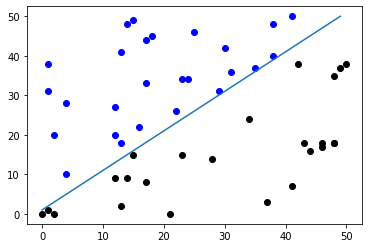

In [ ]:
'''
map all real x values to y line output. Compare out with real y values.
if real y > output y then point is above line(1), otherwise its under(0)
'''

#this array holds the 'correct' answers of whether a point is
#above or below the line, 1 = above, 0 = below
correct = []
for i in range(numPoints):
  #the default value 
  if (y_true[i] > f(x_true[i], m, b)):
    correct.append(1)
  else:
    correct.append(0)
  color = 'black'
  if (correct[i]): 
    color = 'blue'
  plt.scatter(x_true[i], y_true[i], color=color)

plt.plot(range(50), y_outputs, '-')


# Display the plot
print("\nTHIS IS ALL THE PROGRAM RECIEVES AS INPUT\n")
plt.show()


The above illustrates how to categorize points above and below a line. But what about when we don't know the equation! The incredible thing about the Perceptron is its ability to find relationships/patterns when the equation isn't know. It does this by a random slope and changing it by a little bit, over each iteration, until the error is either zero or convergens around a number. 

#Create a Perceptron Object
The Perceptron object starts by receiving:
<br>-number of inputs (here 3 per point -> x, y, bias)
<br>-learning rate
<br>-random weight(-1 >=< 1) per input
<br><br>
Perceptron algorithm:
<br>-accept inputs and multiply each by its respective weight
<br>-sum these weighted inputs
<br>-put sum into an activation function(which here will be):
<br>-if sum is > 0: return 1, else: return 0


In [ ]:
import random

class Perceptron:
  def __init__(self, numFeatures, learningRate):

    #class data members
    self.num = numFeatures
    self.lr = learningRate
    self.bias = 1
    #list of random weights(each is -1, 0, or 1) for each input
    self.weights = [(random.randrange(-1, 1)) for i in range(self.num)]
    self.weights.append(1)

  #accepts 3 element input list(x, y and bias) for weighted sum
  def activate(self, inputs):
    weighted_sum = 0
    terms = list(map(lambda x, y: x * y, inputs, self.weights))
    weighted_sum = sum(terms)
    return 1 if weighted_sum > 0 else 0

  #The training function finds the correct weights for the activation func
  def train(self, inputs, correct):
    inputs.append(self.bias)         #this appends the bias to the inputs list
    guess = self.activate(inputs)    #this results in 0 or 1 
    error = correct - guess #this could be some kind of decimal 
    #if the error is not equal to zero it adjusts the weight        
    if error != 0:
      self.weights = list(map(lambda x, y: x + (self.lr * error * y),\
                              self.weights, inputs))


#TRAINING THE PERCEPTRON
Here I am using the training data coordinate values and the array of desired results(whether they are above or below the line to determine weights. Weights are the coefficents in the equation that describes a line separating the dots. The program at this point does not "know" the equation, so it must determine it. It does this by generating random weights/coefficients and measures how much of an error they result in compared to the desired values. Then it adjusts those weights. 

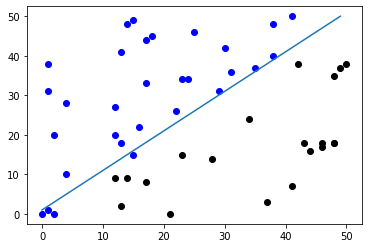

In [ ]:
#instantiating object

numFeatures = 2
learningRate = 0.0001
epochs = 1000
errors = 0

neuron = Perceptron(numFeatures, learningRate)

#train the perceptron object
for i in range(epochs):
  for i in range(numPoints):
    neuron.train([x_true[i], y_true[i]], correct[i])

#display result
for i in range(numPoints):
  x = x_true[i]
  y = y_true[i]
  guess = neuron.activate([x, y, neuron.bias])
  color = 'black'
  if guess == 1:
    color = 'blue'
  else:
    color = 'black'
  plt.scatter(x, y, color = color)
  

plt.plot(range(50), y_outputs, '-')

#TESTING PERCEPTRON
Here we will generate a new set of random data to see how the model performs against it. The model will use the weights generated with the training data.

The number of errors were:  0


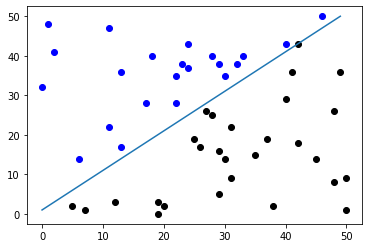

In [ ]:
import time

#creating a new set of random coordinates
numPoints = 50
x_test = [random.randint(0, 50) for x in range(numPoints)]
y_test = [random.randint(0, 50) for x in range(numPoints)]

#creating a new array of correct answers(0 = under line, 1 = over)
correct = []
for i in range(numPoints):
  #the default value 
  if (y_test[i] > f(x_test[i], m, b)):
    correct.append(1)
  else:
    correct.append(0)


#using model to predict outcomes for data
#also counting errors in final prediction

errors = 0
x_errors = []
y_errors = []

#this loops once for each point on the graph
for i in range(numPoints):
  x = x_test[i]
  y = y_test[i]
  guess = neuron.activate([x, y, neuron.bias])
  color = 'black'
  if guess == 1:
    color = 'blue'
  if guess != correct[i]:
    errors += 1
    x_errors.append(x_test[i])
    y_errors.append(y_test[i])
  plt.scatter(x, y, color = color)


for i in range(errors):
  plt.scatter(x_errors, y_errors, color = 'red')


plt.plot(range(50), y_outputs, '-')
print("The number of errors were: ", errors)